In [1]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:
# Carregar os dados
data, target = load_iris(as_frame=True, return_X_y=True)
data['class'] = target
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Exploração dos dados

In [3]:
# renomeia colunas
data.columns = ['sepal length', 'sepal width', 'petal length',
       'petal width', 'class']

In [4]:
data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
data.describe()

,sepal length,sepal width,petal length,petal width,class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
# verificar se existem nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


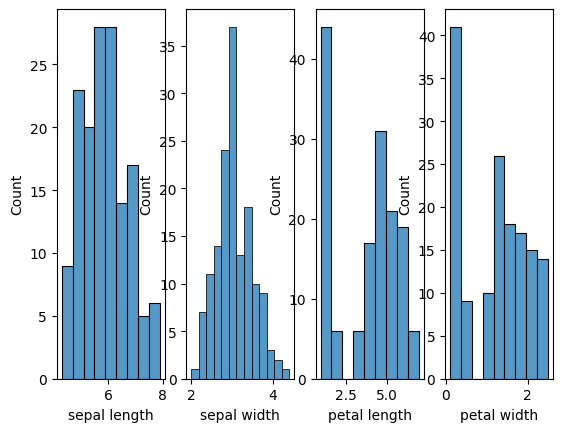

In [7]:
# histograma das variáveis
def histplot(df):
  fig, axs = plt.subplots(ncols=4)
  for i, column in enumerate(data.columns):
    if data[column].dtype == float:
      sns.histplot(data=df, x=column, ax=axs[i])

histplot(data)

<Axes: xlabel='sepal length', ylabel='sepal width'>

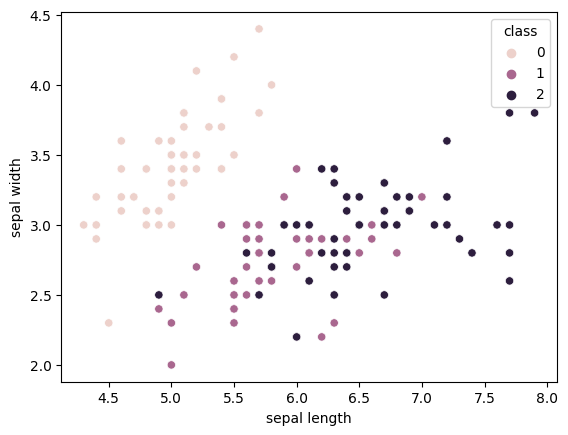

In [8]:
# distribuição por classe
sns.scatterplot(data=data, x=data.columns[0], y=data.columns[1], hue='class')

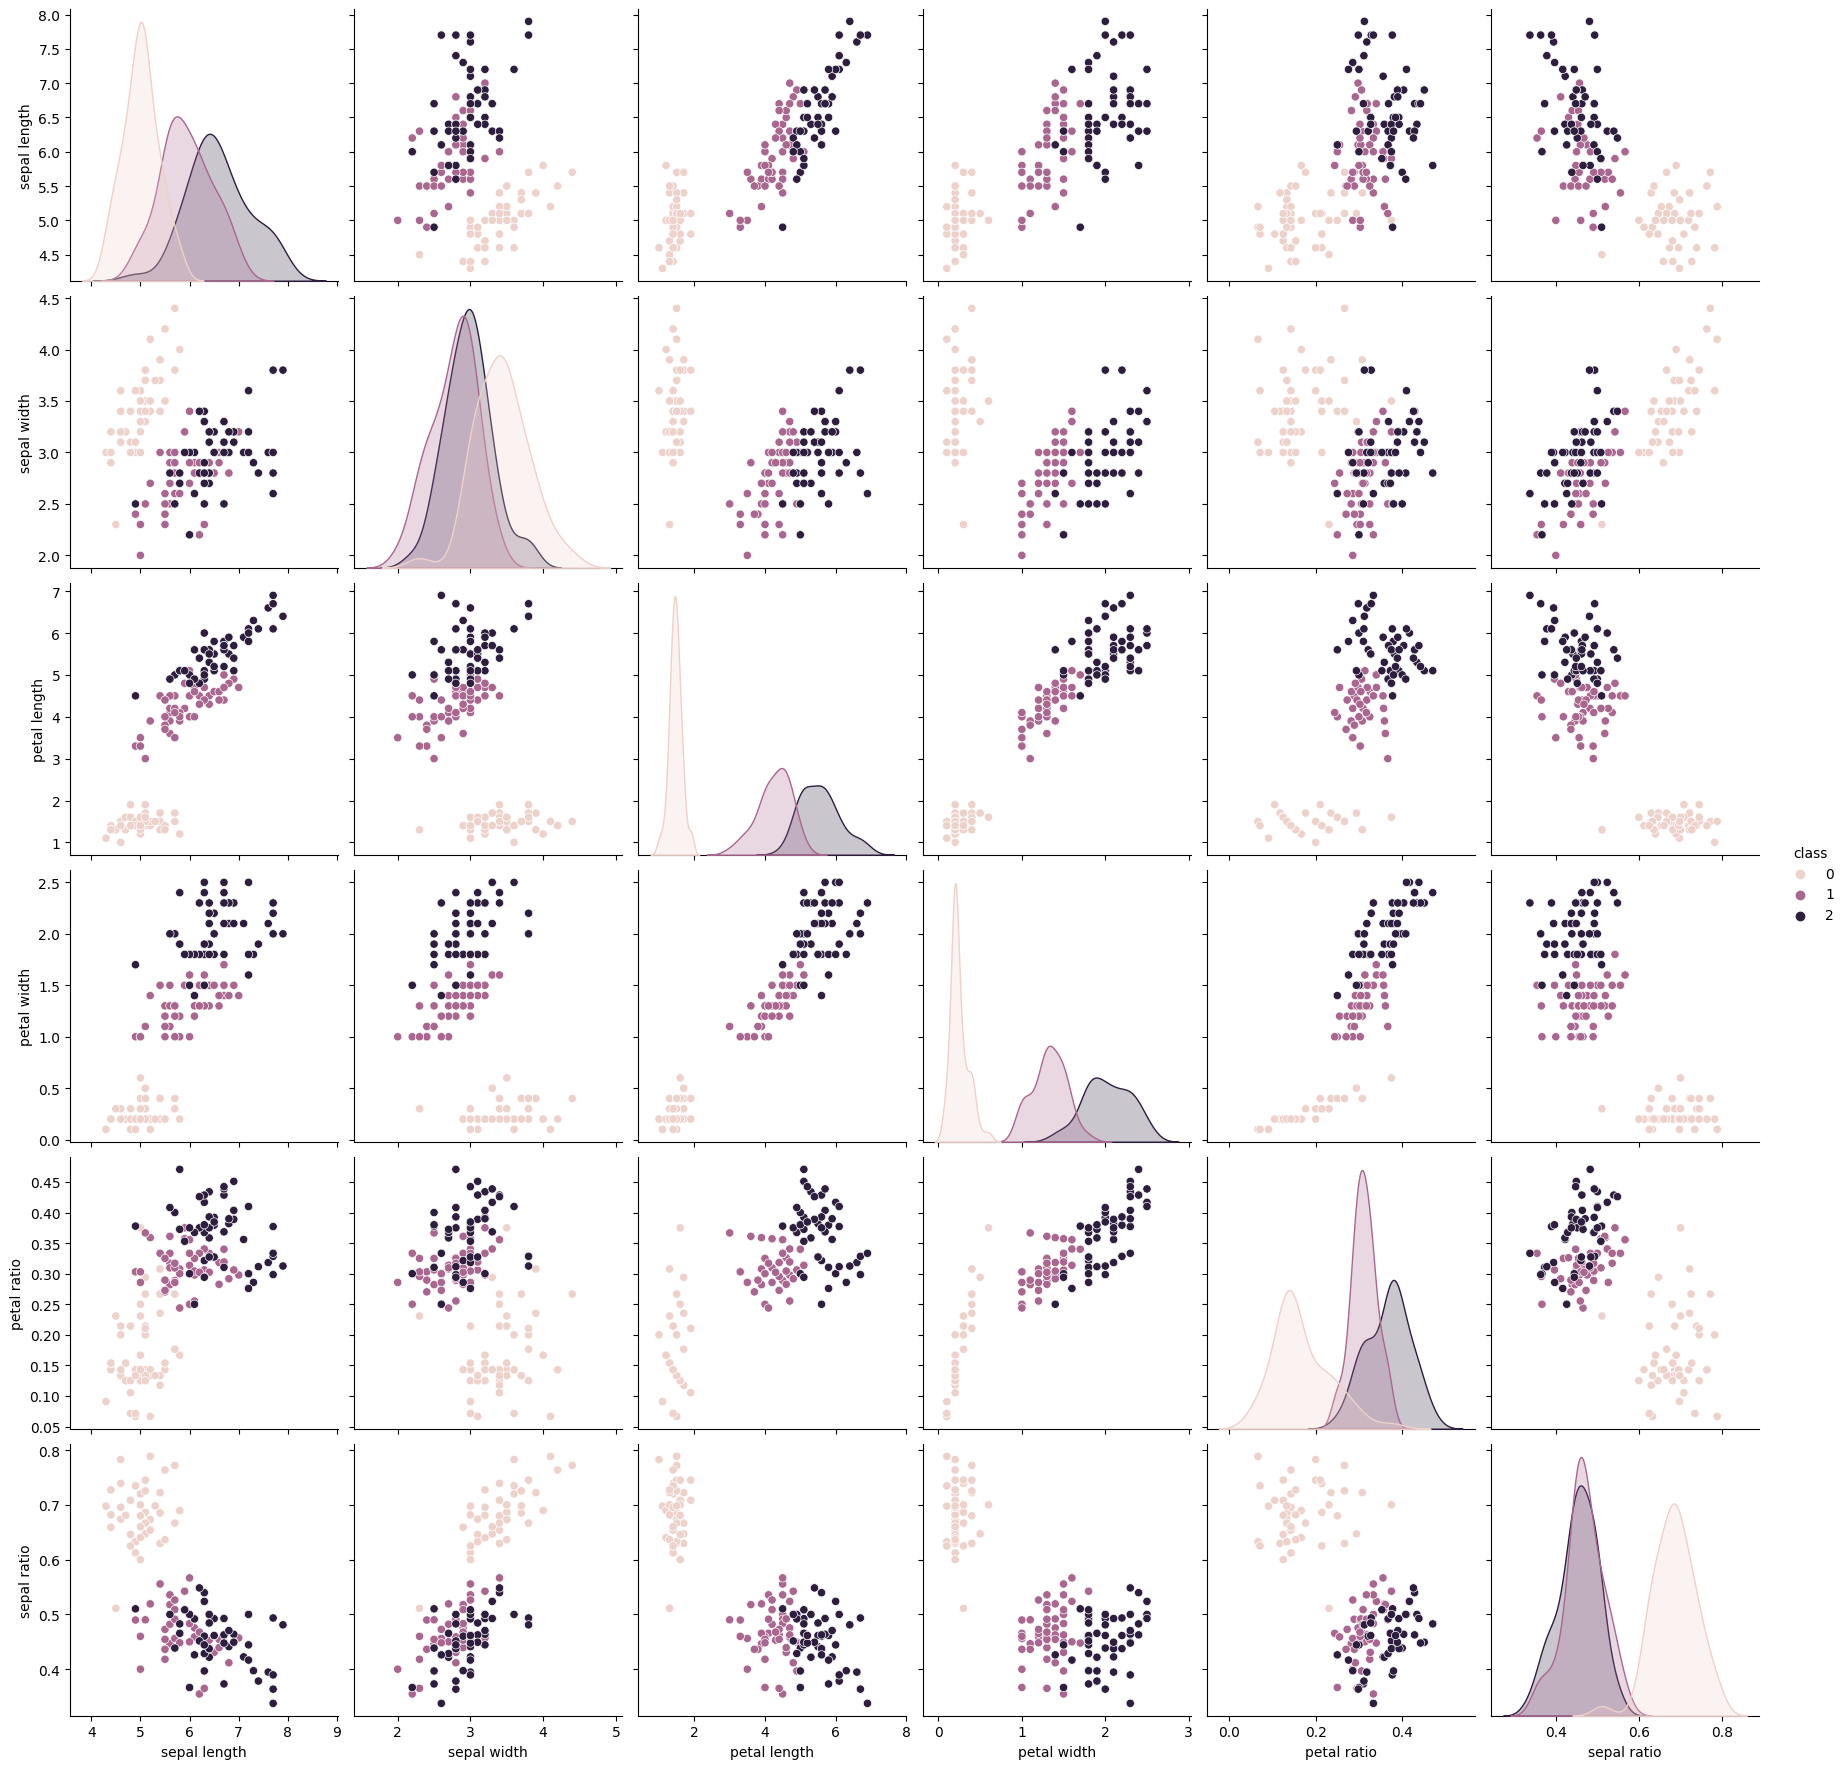

In [9]:
# podem ser criadas variáveis derivadas (podem ou não ser melhores os resultados)
data['petal ratio'] = data['petal width'] / data['petal length']
data['sepal ratio'] = data['sepal width'] / data['sepal length']
sns.pairplot(data=data, hue='class', height=3)

<Axes: >

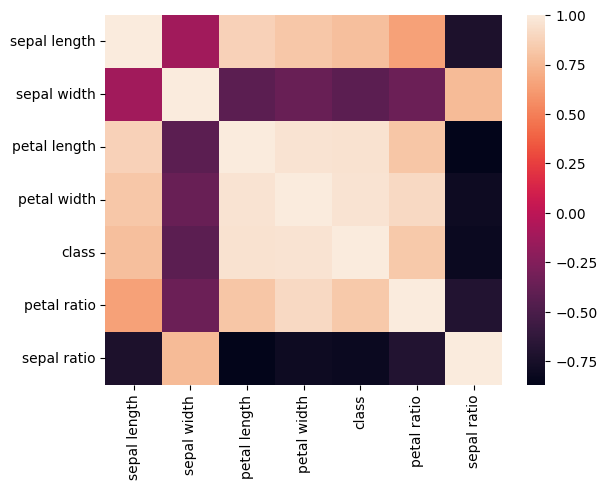

In [10]:
sns.heatmap(data.corr())

# Fazer um modelo de cluster não supervisionado para predizer especie de flor com base nos parametros do modelo.

In [11]:
# base balanceado (mesma quantidade para cada classe)
data['class'].value_counts()

0    50
1    50
2    50
Name: class, dtype: int64

In [12]:
# separação dos dados entre treino e teste
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

In [13]:
len(train), len(test)

(105, 45)

In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=0)
kmeans = kmeans.fit(train[['petal length', 'petal width']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
result = kmeans.predict(data[['petal length', 'petal width']])

In [16]:
data['pred'] = result

In [17]:
data

,sepal length,sepal width,petal length,petal width,class,petal ratio,sepal ratio,pred
0,5.1,3.5,1.4,0.2,0,0.142857,0.686275,1
1,4.9,3.0,1.4,0.2,0,0.142857,0.612245,1
2,4.7,3.2,1.3,0.2,0,0.153846,0.680851,1
3,4.6,3.1,1.5,0.2,0,0.133333,0.673913,1
4,5.0,3.6,1.4,0.2,0,0.142857,0.720000,1
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0.442308,0.447761,0
146,6.3,2.5,5.0,1.9,2,0.380000,0.396825,3
147,6.5,3.0,5.2,2.0,2,0.384615,0.461538,3
148,6.2,3.4,5.4,2.3,2,0.425926,0.548387,0


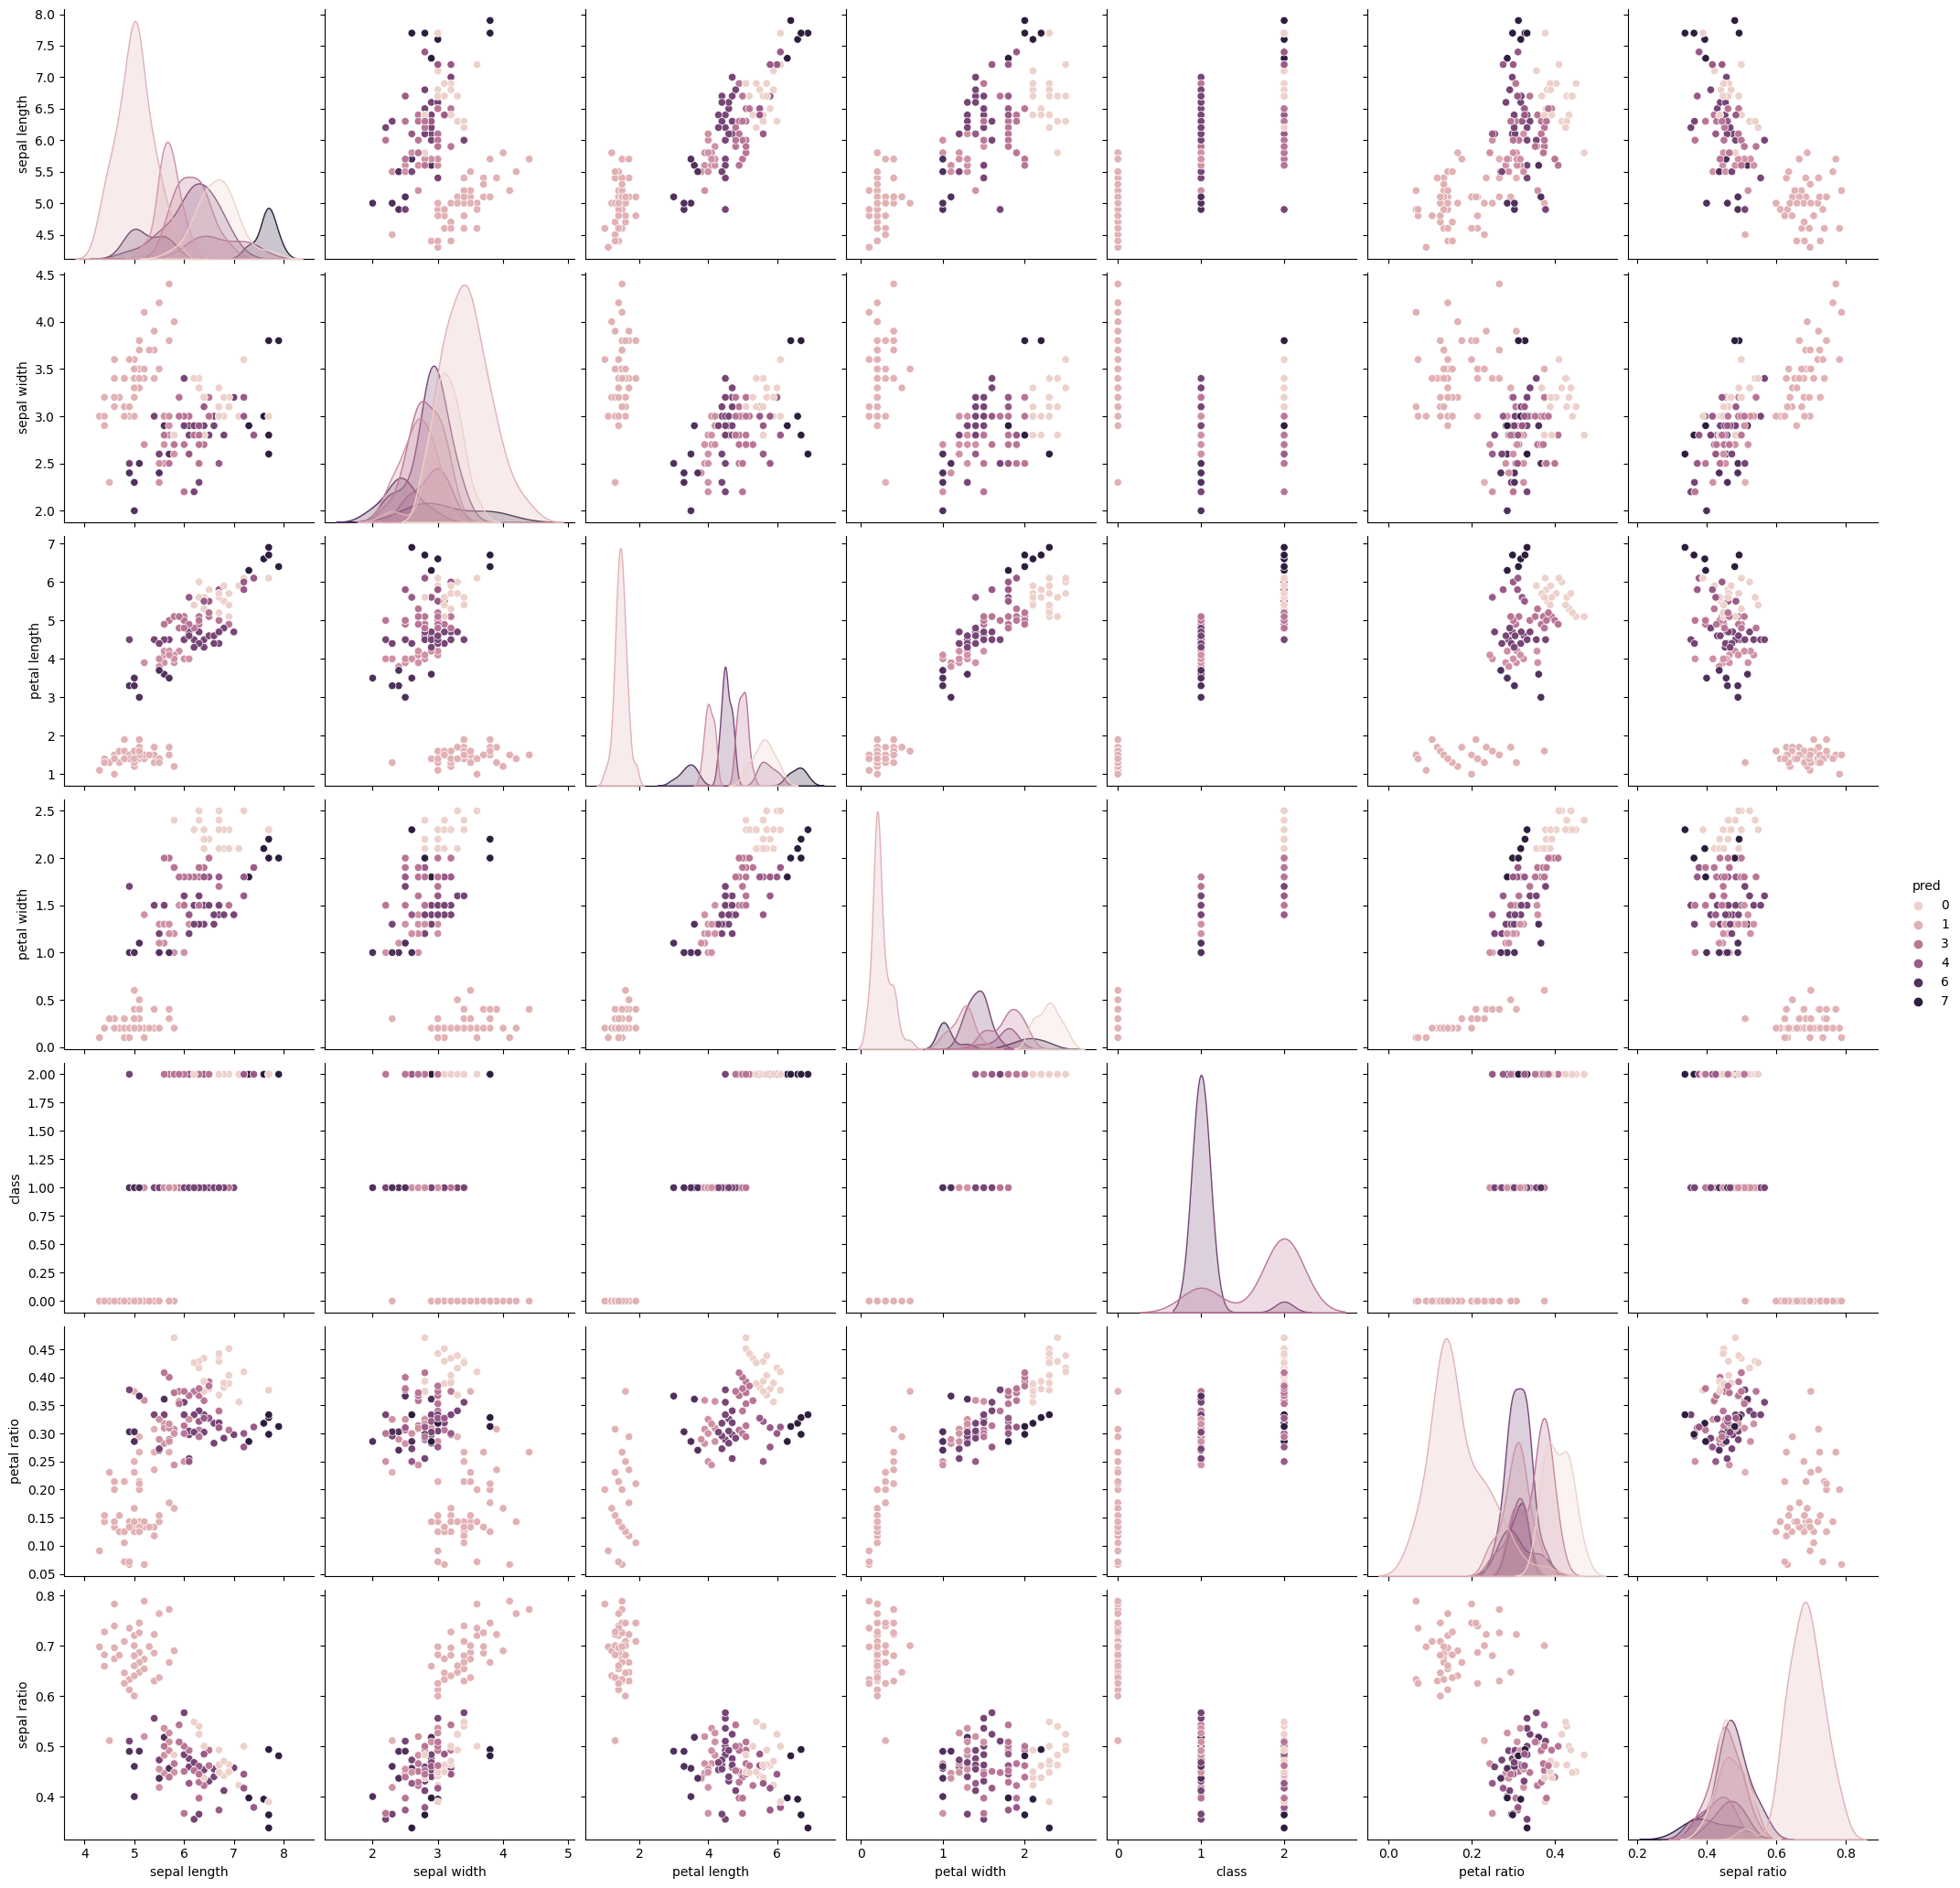

In [18]:
sns.pairplot(data=data, hue='pred', height=3)

In [19]:
(data['class'] == data['pred']).sum()

0

<Axes: xlabel='petal length', ylabel='petal width'>

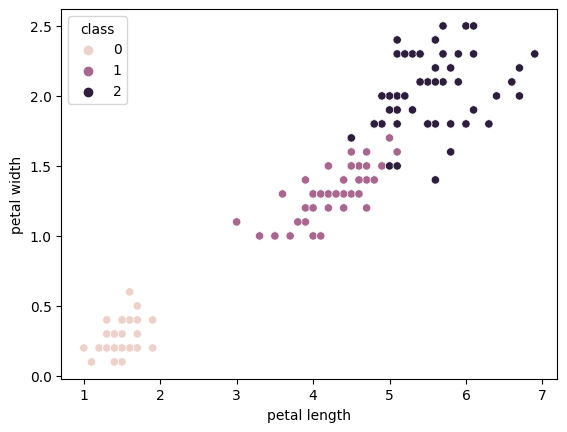

In [20]:
sns.scatterplot(data=data, x='petal length', y='petal width', hue='class')

<Axes: xlabel='petal length', ylabel='petal width'>

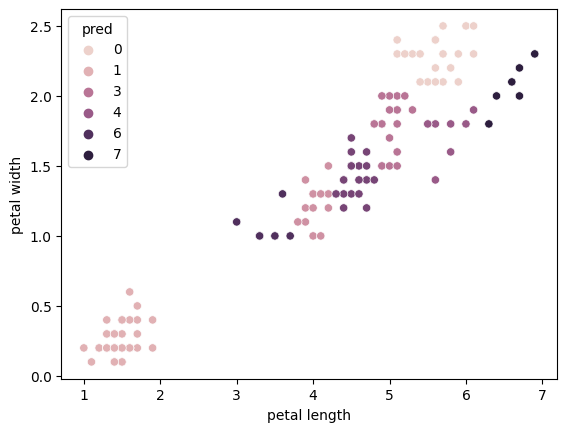

In [21]:
sns.scatterplot(data=data, x='petal length', y='petal width', hue='pred')

In [22]:
dict(data.groupby(["pred", 'class']).size().groupby(level=1).nlargest(1).reset_index(0, drop=True).to_dict().keys())
#grouped_df.to_frame("quantity").sort_values(ascending=False, by='quantity')

{1: 0, 5: 1, 0: 2}

In [23]:
data.groupby(["pred", 'class']).size().groupby(level=0).nlargest(1).reset_index(0, drop=True)

pred  class
0     2        20
1     0        50
2     1        16
3     2        15
4     2         8
5     1        22
6     1         7
7     2         6
dtype: int64

In [24]:
data['pred_label'] = data['pred'].replace({1:0, 2:1, 0:2})

In [25]:
(data['class'] == data['pred_label']).sum() / len(data)

0.5733333333333334

Elbow

In [26]:
from sklearn.cluster import KMeans

metrica = []

for x in range(2, 10):
  # cria k-means
  kmeans = KMeans(n_clusters=x, random_state=0)
  kmeans = kmeans.fit(train[['petal length', 'petal width']])
  # Faz predicao
  result = kmeans.predict(data[['petal length', 'petal width']])
  # cria nova coluna com os resultados
  data['pred'] = result
  # cria dicionario com os valores co
  label_name = dict(data.groupby(["pred", 'class']).size().groupby(level=0).nlargest(1).reset_index(0, drop=True).to_dict().keys())
  data['pred_label'] = data['pred'].replace(label_name)
  metrica.append((x, 1-(data['class'] == data['pred_label']).sum() / len(data)))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [27]:
print(metrica)

[(2, 0.33333333333333337), (3, 0.040000000000000036), (4, 0.1266666666666667), (5, 0.040000000000000036), (6, 0.08666666666666667), (7, 0.08666666666666667), (8, 0.040000000000000036), (9, 0.046666666666666634)]


<Axes: xlabel='0', ylabel='1'>

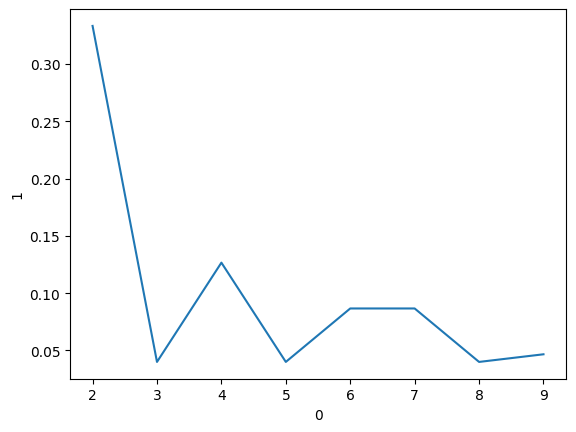

In [28]:
metrica_df = pd.DataFrame(metrica)
sns.lineplot(data=metrica_df, x=0, y=1)